In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline

In [10]:
data=pd.read_csv("lung_cancer_examples.csv")
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [11]:
df=data.drop(columns=['Name','Surname'])

In [12]:
df.isnull().sum()


Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [13]:
df['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

In [188]:
X = df.drop(columns=['Result'])
y= df['Result']

<AxesSubplot:>

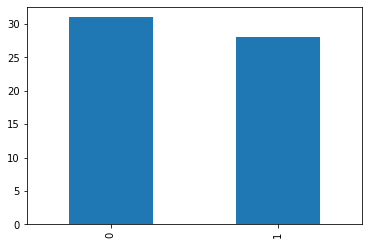

In [189]:
data['Result'].value_counts().plot(kind='bar')

In [190]:

#########.........Spiliting Dataset.........

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [ ]:
####  ........Naive Bayes..............

In [191]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)


GaussianNB()

In [192]:
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))
print('----------------------------------------------------')


GaussianNBModel Train Score is :  1.0
GaussianNBModel Test Score is :  1.0
----------------------------------------------------


In [193]:
#.............Value Prediction.........
y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
print('Predicted Value for GaussianNBModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GaussianNBModel is : ' , y_pred_prob[:10])

Predicted Value for GaussianNBModel is :  [0 0 1 1 0 1 1 0 0 0]
Prediction Probabilities Value for GaussianNBModel is :  [[9.96686967e-01 3.31303296e-03]
 [9.98775744e-01 1.22425552e-03]
 [3.71475659e-01 6.28524341e-01]
 [3.19628440e-07 9.99999680e-01]
 [9.99999097e-01 9.02684008e-07]
 [1.57042434e-01 8.42957566e-01]
 [6.43527616e-04 9.99356472e-01]
 [9.99730774e-01 2.69225824e-04]
 [9.91208214e-01 8.79178585e-03]
 [9.99990480e-01 9.52034164e-06]]


In [194]:
#...........confusion matrix........
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[13  0]
 [ 0  7]]


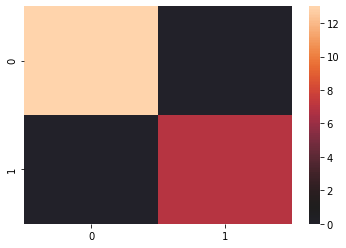

In [195]:
sns.heatmap(CM, center = True)
plt.show()

In [196]:
#.......test Value...........

acc_test = accuracy_score(y_test, y_pred)

print(acc_test)

1.0


In [197]:
#.......Bernolli.........
from sklearn.naive_bayes import BernoulliNB

BernoulliNBModel = BernoulliNB(alpha=1,binarize=1)
BernoulliNBModel.fit(X_train, y_train)

BernoulliNB(alpha=1, binarize=1)

In [198]:
print('BernoulliNBModel Train Score is : ' , BernoulliNBModel.score(X_train, y_train))
print('BernoulliNBModel Test Score is : ' , BernoulliNBModel.score(X_test, y_test))
print('----------------------------------------------------')

BernoulliNBModel Train Score is :  0.7948717948717948
BernoulliNBModel Test Score is :  0.7
----------------------------------------------------


In [199]:
y_pred = BernoulliNBModel.predict(X_test)
y_pred_prob = BernoulliNBModel.predict_proba(X_test)
print('Predicted Value for BernoulliNBModel is : ' , y_pred)
print('Prediction Probabilities Value for BernoulliNBModel is : ' , y_pred_prob)

Predicted Value for BernoulliNBModel is :  [1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1]
Prediction Probabilities Value for BernoulliNBModel is :  [[0.32629964 0.67370036]
 [0.92869036 0.07130964]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]
 [0.96954456 0.03045544]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]
 [0.92869036 0.07130964]
 [0.32629964 0.67370036]
 [0.92869036 0.07130964]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]
 [0.92869036 0.07130964]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]
 [0.54211214 0.45788786]
 [0.92869036 0.07130964]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]
 [0.32629964 0.67370036]]


In [200]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[7 6]
 [0 7]]


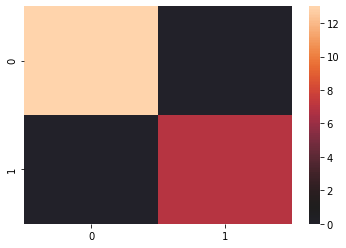

In [201]:
sns.heatmap(CM, center = True)
plt.show()

In [202]:
acc_test = accuracy_score(y_test, y_pred)

print(acc_test)

0.7


<AxesSubplot:>

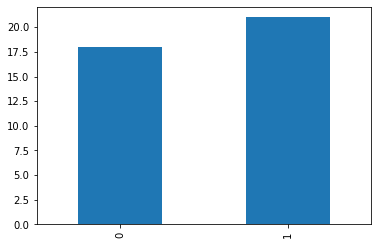

In [203]:
y_train.value_counts().sort_index().plot.bar()

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import FunctionTransformer


In [205]:
def function1(z):
    return np.power(z,4)



In [206]:
f = FunctionTransformer(func = function1)
f.fit(X)
x_f = f.transform(X)

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
result= logreg.predict(X_test)
print(accuracy_score(y_test , result))

0.95


In [207]:
conf = confusion_matrix(y_test , result)
print('confusion matrix \n',  conf)

confusion matrix 
 [[13  0]
 [ 1  6]]


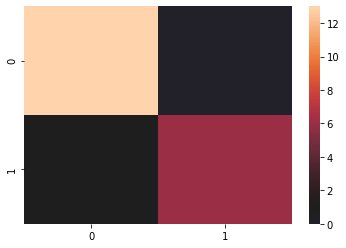

In [208]:
sns.heatmap(conf, center = True)
plt.show()
 

In [209]:

classifier = SVC(kernel='linear', random_state = 0,C=0.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)




In [210]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  1]
 [ 2  5]]


In [211]:

acc_test = accuracy_score(y_test, y_pred)

print(acc_test)


0.85


<AxesSubplot:>

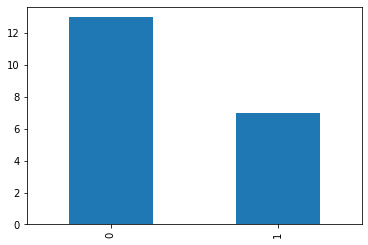

In [212]:
y_test.value_counts().sort_index().plot.bar()

In [213]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [214]:
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[11  2]
 [ 1  6]]


In [215]:
# calculate sensitivity and specificity
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy : ',accuracy)


Accuracy :  0.85


In [216]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =3, criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [217]:
cm1 = confusion_matrix(y_test, y_pred)

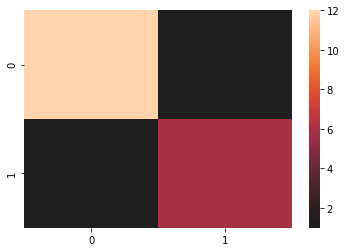

In [218]:
sns.heatmap(cm1,center=True)

plt.show()

In [219]:
  # Predicting the Test set results

y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[12  1]
 [ 1  6]]


In [220]:
acc_test = accuracy_score(y_test, y_pred)
print('the accuarcy of random forest model is :')
print(acc_test)

the accuarcy of random forest model is :
0.9


In [14]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

NameError: name 'pickle' is not defined

In [15]:
with open('model_pickle','rb') as f:
    mb = pickle.load(f)


NameError: name 'pickle' is not defined

In [3]:
mp.perdict(5000)

NameError: name 'mp' is not defined

In [4]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [5]:
joblib.dump(model,'model_joblib')

NameError: name 'joblib' is not defined

In [6]:
mj = joblib.load('model_joblib')

NameError: name 'joblib' is not defined

In [7]:
mj.perdict(5000)

NameError: name 'mj' is not defined